 [시계열 데이터의 기초와 Pandas] 이 시간의 핵심 목표는 "컴퓨터가 시간을 '글자(String)'가 아닌 '시간(Datetime)'으로 인식하게 만드는 것"이다. 이것이 되어야 이후의 모든 분석이 가능하다.

---

# 📘 시계열 데이터의 기초와 Pandas

## 1. 시계열 데이터(Time-Series Data)란 무엇인가?

### 1.1. 정의와 특성
*   정의: 일정한 시간 간격(Interval)으로 배치된 데이터들의 수열이다.
*   핵심: 데이터의 순서가 매우 중요하다. 비시계열 데이터는 행(Row)의 순서를 섞어도 통계값(평균 등)이 변하지 않지만, 시계열 데이터는 순서를 섞으면 '추세'와 '패턴'이라는 정보가 파괴된다.
*   비유:
    *   비시계열(Day 1): 환자의 증명사진. 현재 상태를 보여준다.
    *   시계열(Day 2): 환자의 동영상(CCTV). 상태가 어떻게 변해왔는지 과정을 보여준다.

### 1.2. 헬스케어 시계열 데이터의 종류
1.  규칙적 시계열 (Regular Time-Series):
    *   일정한 간격으로 측정된 데이터이다.
    *   *예시:* 중환자실(ICU) 모니터의 심박수(1초마다), 스마트워치의 활동량(1분마다).
2.  불규칙적 시계열 (Irregular Time-Series):
    *   사건(Event)이 발생할 때만 기록되는 데이터이다.
    *   *예시:* 외래 방문 기록(어떤 환자는 3일 뒤, 어떤 환자는 3달 뒤 방문), 응급실 내원 시각.
    *   *분석 전략:* 불규칙한 데이터를 규칙적인 간격(예: 일별, 월별)으로 변환(Resampling)하여 분석하는 것이 일반적이다.

---

## 2. Python Pandas에서의 시계열 처리

### 2.1. 문자열(String) vs 시간 객체(Timestamp)
엑셀 파일이나 CSV를 불러오면, 컴퓨터는 날짜를 단순히 '문자(Text)'로 인식한다.
*   문자열: "2025-01-01"은 그저 숫자와 하이픈의 조합일 뿐이다. "2025-01-01" + 1일 = ? (계산 불가)
*   타임스탬프: 컴퓨터가 '시간의 흐름'을 이해한다. "2025-01-01" + 1일 = "2025-01-02" (계산 가능)

### 2.2. DatetimeIndex의 중요성
Pandas에서 시계열 분석을 하려면, 시간 컬럼을 인덱스(Index)로 설정해야 한다.
*   인덱스로 설정한다는 것은 엑셀의 '행 번호(1, 2, 3...)' 대신 '날짜(1일, 2일, 3일...)'를 행의 기준으로 삼겠다는 뜻이다.
*   장점:
    1.  Slicing: `df['2025-03']`이라고 입력하면 3월 데이터만 즉시 추출된다.
    2.  Resampling: `df.resample('M').mean()`이라고 하면 월별 평균을 자동으로 구해준다.
    3.  Plotting: 그래프를 그릴 때 x축이 자동으로 날짜 포맷으로 예쁘게 정리된다.

---
---

# 💻시계열 기초: 시간으로 변환하고 인덱스 설정하기

이 노트북은 가장 기초적이지만 가장 중요한 `pd.to_datetime`과 `set_index`를 다룬다.

### 1. 환경 설정

In [1]:
# 필요 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("설정 완료.")

설정 완료.


### 2. 시계열 데이터 만들기 (가상 데이터)
병원 EMR 시스템에서 데이터를 다운로드 받으면 보통 아래와 같이 날짜가 '문자열' 형태로 되어 있다. 심박수(HR)와 체온(Temp) 데이터를 생성한다.

In [2]:
# 가상의 시계열 데이터 생성 (문자열 형태의 날짜)
data = {
    'Time_Record': [
        '2025-01-01 09:00', '2025-01-01 09:15', '2025-01-01 09:30', '2025-01-01 09:45',
        '2025-01-01 10:00', '2025-01-01 10:15', '2025-01-01 10:30', '2025-01-01 10:45',
        '2025-01-01 11:00', '2025-01-01 11:15'
    ],
    'Heart_Rate': [72, 75, 78, 82, 110, 105, 88, 76, 74, 73], # 10시경 일시적 상승
    'Body_Temp': [36.5, 36.5, 36.6, 36.7, 37.2, 37.1, 36.8, 36.6, 36.5, 36.5]
}

df = pd.DataFrame(data)

print("원본 데이터 정보:")
df.info()
# 출력 결과를 보면 'Time_Record'의 Dtype이 'object'(문자열)임을 확인할 수 있다.
# object 상태에서는 시계열 분석이 불가능하다.

원본 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time_Record  10 non-null     object 
 1   Heart_Rate   10 non-null     int64  
 2   Body_Temp    10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


### 3. 문자열을 시간 객체로 변환하기 (`pd.to_datetime`)
Pandas의 가장 강력한 함수 중 하나인 `to_datetime`을 사용하여 문자열을 실제 시간(Timestamp)으로 변경한다.

In [3]:
# 문자열 -> datetime 객체 변환
df['Time_Record'] = pd.to_datetime(df['Time_Record'])

print("\n변환 후 데이터 정보:")
df.info()
# 이제 'Time_Record'의 Dtype이 'datetime64[ns]'로 변경되었다.


변환 후 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time_Record  10 non-null     datetime64[ns]
 1   Heart_Rate   10 non-null     int64         
 2   Body_Temp    10 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.0 bytes


### 4. 시계열 인덱스 설정하기 (`set_index`)
시간 컬럼을 데이터프레임의 인덱스(행의 이름)로 설정한다. 이렇게 해야 시계열 전용 기능을 사용할 수 있다.

In [4]:
# Time_Record 컬럼을 인덱스로 설정
df_ts = df.set_index('Time_Record')

print("\n인덱스 설정 후 데이터:")
display(df_ts.head())

# 인덱스가 된 날짜는 이제 컬럼 리스트에서 사라지고, 가장 왼쪽에 굵은 글씨로 위치한다.


인덱스 설정 후 데이터:


,Heart_Rate,Body_Temp
Time_Record,,
2025-01-01 09:00:00,72,36.5
2025-01-01 09:15:00,75,36.5
2025-01-01 09:30:00,78,36.6
2025-01-01 09:45:00,82,36.7
2025-01-01 10:00:00,110,37.2


### 5. 시계열 데이터의 강력함: 시간으로 조회하기 (Slicing)
일반적인 리스트 슬라이싱(`[0:5]`)이 아니라, "시간"을 기준으로 데이터를 잘라낼 수 있다.

In [5]:
# 1. 특정 시간대 데이터 추출 (예: 10시 데이터만 보고 싶다)
# 문자열로 '2025-01-01 10'만 입력하면 10:00 ~ 10:59 데이터를 모두 가져온다.
target_data = df_ts.loc['2025-01-01 10']

print("\n[추출 결과] 10시대의 환자 바이탈 데이터:")
display(target_data)

# 2. 특정 구간 조회 (Range Slicing)
# 09:30 부터 10:15 까지
range_data = df_ts.loc['2025-01-01 09:30':'2025-01-01 10:15']
print("\n[추출 결과] 09:30 ~ 10:15 데이터:")
display(range_data)


[추출 결과] 10시대의 환자 바이탈 데이터:


,Heart_Rate,Body_Temp
Time_Record,,
2025-01-01 10:00:00,110,37.2
2025-01-01 10:15:00,105,37.1
2025-01-01 10:30:00,88,36.8
2025-01-01 10:45:00,76,36.6



[추출 결과] 09:30 ~ 10:15 데이터:


,Heart_Rate,Body_Temp
Time_Record,,
2025-01-01 09:30:00,78,36.6
2025-01-01 09:45:00,82,36.7
2025-01-01 10:00:00,110,37.2
2025-01-01 10:15:00,105,37.1


### 6. 기초 시각화
인덱스가 시간(Datetime)으로 설정되어 있으면, `plot()` 함수 호출 시 x축이 자동으로 시간축으로 설정된다.

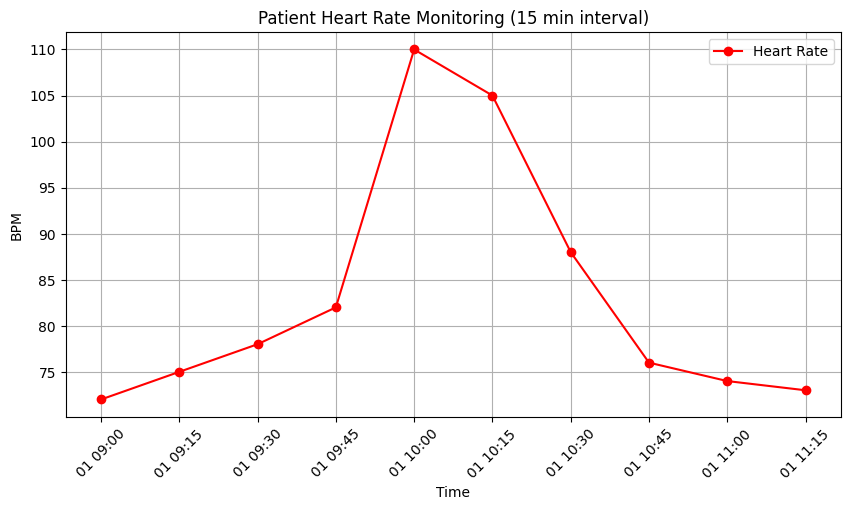

In [6]:
plt.figure(figsize=(10, 5))

# 심박수 그래프 그리기
plt.plot(df_ts.index, df_ts['Heart_Rate'], marker='o', linestyle='-', color='red', label='Heart Rate')

# 그래프 꾸미기
plt.title("Patient Heart Rate Monitoring (15 min interval)")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.grid(True)
plt.legend()

# 날짜 포맷팅 (x축 글씨가 겹치지 않게 회전)
plt.xticks(rotation=45)

plt.show()

### 📝 실습 과제
위의 데이터를 바탕으로 다음 코드를 직접 작성해 본다.
1.  오전 11시 이후(`11:00`~)의 데이터만 뽑아서 출력한다.
2.  `Body_Temp`(체온) 그래프를 파란색(`color='blue'`) 선으로 그려본다.

11시 이후 데이터:


,Heart_Rate,Body_Temp
Time_Record,,
2025-01-01 11:00:00,74,36.5
2025-01-01 11:15:00,73,36.5


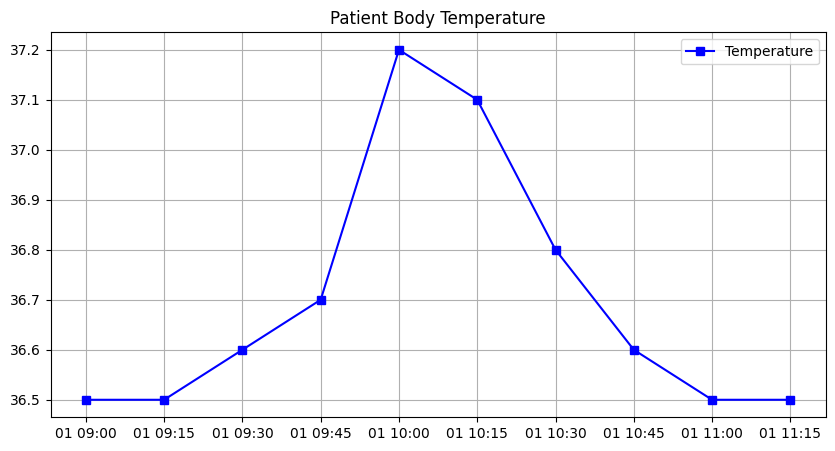

In [7]:
# [실습 답안 예시]

# 1. 11시 이후 데이터 추출
print("11시 이후 데이터:")
display(df_ts.loc['2025-01-01 11':])

# 2. 체온 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(df_ts.index, df_ts['Body_Temp'], marker='s', color='blue', label='Temperature')
plt.title("Patient Body Temperature")
plt.grid(True)
plt.legend()
plt.show()